In [1]:
from torch.utils.data import Dataset
from PIL import Image
import os
import sys

import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(os.path.join('..')))

from local_datasets import LaPaDataset

In [4]:
# C:\Users\appel\Documents\Project\Dynaphos\data\face\LaPa\LaPa

lapa = LaPaDataset('C:\\Users\\appel\\Documents\\Project\\Dynaphos\\data\\face\\LaPa', circular_mask=True)

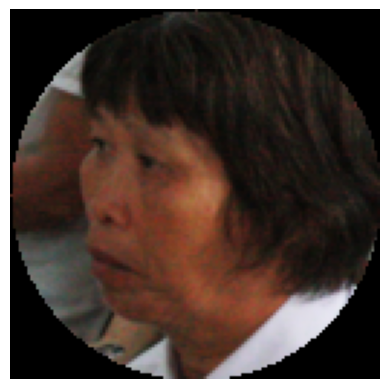

In [5]:
plt.axis('off')
plt.imshow(lapa[3][0].cpu().permute(1, 2, 0))  
plt.show()

In [ ]:
plt.axis('off')
plt.imshow(lapa[3][1].cpu().permute(1, 2, 0))  
plt.show()

In [8]:
def calculate_class_weights(dataset, n_classes=10):
    class_counts = [0] * n_classes
    for i in range(len(dataset)):
        _, label = dataset[i]
        # label is a segmentation map with n_classes different values
        for c in range(n_classes):
            class_counts[c] += (label == c).sum()

    total_count = sum(class_counts)
    class_weights = [total_count / count for count in class_counts]
    return class_weights

In [9]:
class_weights = calculate_class_weights(lapa, 11)
print(class_weights)

[tensor(1.4533, device='cuda:0'), tensor(6.8082, device='cuda:0'), tensor(457.7538, device='cuda:0'), tensor(465.1386, device='cuda:0'), tensor(776.2798, device='cuda:0'), tensor(774.8492, device='cuda:0'), tensor(89.9904, device='cuda:0'), tensor(532.1101, device='cuda:0'), tensor(520.0670, device='cuda:0'), tensor(319.2630, device='cuda:0'), tensor(7.1391, device='cuda:0')]


In [10]:
class_weights_list = [x.item() for x in class_weights]
class_weights_list

[1.453307867050171,
 6.808194160461426,
 457.75384521484375,
 465.1385803222656,
 776.2798461914062,
 774.8491821289062,
 89.99043273925781,
 532.110107421875,
 520.0670166015625,
 319.2629699707031,
 7.1391448974609375]

In [11]:
rounded_class_weights = [round(x, 2) for x in class_weights_list]
print(rounded_class_weights)

[1.45, 6.81, 457.75, 465.14, 776.28, 774.85, 89.99, 532.11, 520.07, 319.26, 7.14]


In [12]:
# Without circle mask
weights_without_circle_mask = [1.4702099561691284, 6.801918029785156, 457.61663818359375, 464.97509765625, 776.2029418945312, 774.67578125, 89.99040985107422, 532.0863037109375, 520.0242919921875, 319.2359313964844, 6.763819694519043]
rounded = [1.45, 6.81, 457.75, 465.14, 776.28, 774.85, 89.99, 532.11, 520.07, 319.26, 7.14]

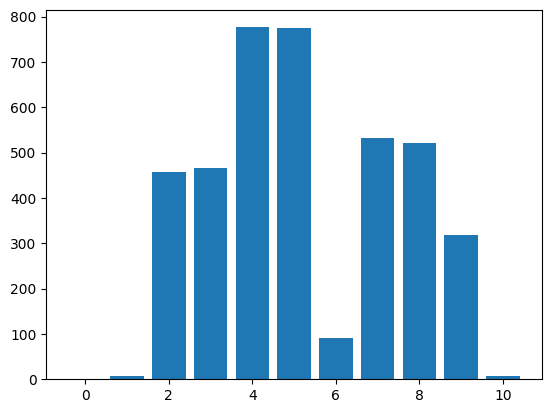

In [13]:
# plot both cases
plt.bar(range(11), rounded_class_weights)
plt.show()

<BarContainer object of 11 artists>

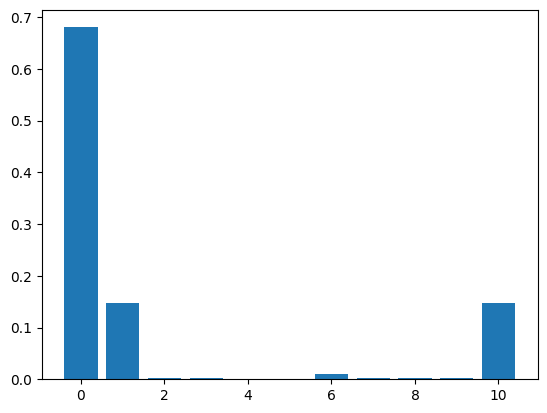

: 

In [9]:
plt.bar(range(11), [1/i for i in rounded_class_weights])

In [77]:
1e-4

0.0001